In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from keras.models import Sequential
%matplotlib inline

from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils


import tensorflow as tf
import keras.backend.tensorflow_backend as tfback
#...ba bla
print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

import keras.backend.tensorflow_backend as tfback


tf.__version__ is 2.2.0
tf.keras.__version__ is: 2.3.0-tf


Using TensorFlow backend.


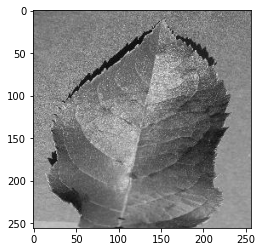

(256, 256)
[[ 97 101 105 ... 116 124 111]
 [108 111 115 ... 109 137  95]
 [107 108 109 ... 141  79 140]
 ...
 [186 186 186 ... 152 153 154]
 [186 186 185 ... 151 150 150]
 [186 185 184 ... 148 146 145]]


In [ ]:
DATADIR = "/content/drive/My Drive/dataset/train"

#CATEGORIES = ["Apple___Apple_scab", "Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy"]

CATEGORIES=["Apple___Apple_scab", "Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy","Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot","Corn_(maize)___Common_rust_","Corn_(maize)___healthy","Corn_(maize)___Northern_Leaf_Blight","Grape___Black_rot","Grape___Esca_(Black_Measles)","Grape___healthy","Grape___Leaf_blight_(Isariopsis_Leaf_Spot)","Potato___Early_blight","Potato___healthy","Potato___Late_blight","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]
for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show() 
        
        
        break
      
    break


print(img_array.shape)


print(img_array)

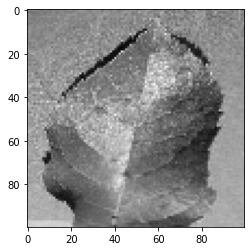

array([[108, 117, 123, ..., 151, 113, 126],
       [103, 105, 106, ..., 149, 131, 121],
       [119, 125, 109, ..., 139, 106, 122],
       ...,
       [187, 185, 184, ..., 156, 156, 160],
       [185, 185, 186, ..., 152, 147, 153],
       [186, 184, 182, ..., 159, 153, 149]], dtype=uint8)

In [ ]:
img_size=100
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()
new_array

In [ ]:

training_data = []

def create_training_data():
    for category in CATEGORIES: 
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  
        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (img_size, img_size))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                print("hi")
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))





x=len(training_data)
x


25285


25285

In [ ]:
import random

random.shuffle(training_data)




for sample in training_data[:10]:
    print(sample[1])



X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(len(X),1,img_size,img_size)




11
18
6
24
11
11
14
19
21
11


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()














In [ ]:


pickle_in=open("X.pickle","rb")
pickle.load(pickle_in)
X=X/255.0
X.shape
y=np_utils.to_categorical(y,25)


In [ ]:
"""def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]


tfback._get_available_gpus = _get_available_gpus
"""


model=Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(1,100,100),data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(256,activation='relu'))
model.add(Dense(25,activation='softmax'))

help(model.compile)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

X=model.fit(X,y,batch_size=10,epochs=10,verbose=1)


Help on method compile in module keras.engine.training:

compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    # Arguments
        optimizer: String (name of optimizer) or optimizer instance.
            See [optimizers](/optimizers).
        loss: String (name of objective function) or objective function or
            `Loss` instance. See [losses](/losses).
            If the model has multiple outputs, you can use a different loss
            on each output by passing a dictionary or a list of losses.
            The loss value that will be minimized by the model
            will then be the sum of all individual losses.
        metrics: List of metrics to be evaluated by the model
            during training and testing. Typically you will use
            `metrics=['accuracy']`. To specify diffe

In [ ]:
#summary of the model
summery=model.summary()
print(summery)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 98, 98)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 49, 98)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 47, 32)        28256     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 23, 32)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 21, 64)         18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 10, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)             

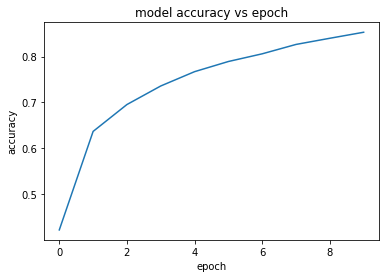

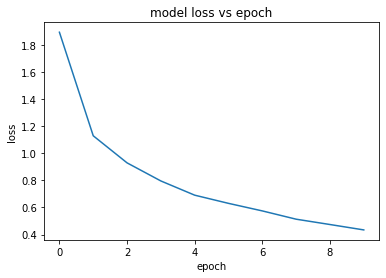

In [ ]:
#Graph ploting betwwen epach vs accuracy and eppoch vs loss
#sumarize the history for accuracy
plt.plot(X.history["accuracy"])
plt.title('model accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(X.history['loss'])
plt.title('model loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from keras.models import load_model
model.save("saved_model1.hs")
loaded_model=load_model("saved_model1.hs")

In [ ]:
#prediction of img for give path in Test_Data_Dir
Test_Data_Dir='/content/drive/My Drive/test'
prediction_list=[]
def prepare_prediction_data(filepath):
    for img in os.listdir(filepath):
        img_array=cv2.imread(os.path.join(filepath, img),cv2.IMREAD_GRAYSCALE)
        resize_image=cv2.resize(img_array,(100,100))
        prediction_list.append([resize_image])
    new_array=np.array(prediction_list)
    return new_array.reshape(len(prediction_list),1,100,100)
prediction=loaded_model.predict([prepare_prediction_data(Test_Data_Dir)])
#print(prediction)
image_index=[]
for img_array in prediction:
    for img_label_index in range(len(img_array)):
        if(img_array[img_label_index]==1):
            image_index.append(img_label_index)
            print(img_label_index)



6


Real Image vs Prediction
-----------------------------------
-----------------------------------


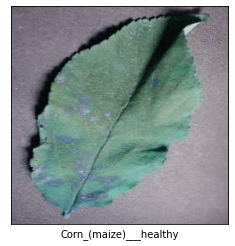

In [ ]:
#Graph ploting image vs prediction
image_for_plot=[]   #image list for ploting
image_name=[]    #for storing the index of the category(predicted)
i=0
print("Real Image vs Prediction")
print("-----------------------------------")
print("-----------------------------------")
def prepare_plot_data(filepath):
    for img,label in zip(os.listdir(filepath),image_index):
        image_name.append(os.path.split(img)[-1])
        img_array=cv2.imread(os.path.join(filepath, img))
        plt.imshow(img_array)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(CATEGORIES[label])
        plt.show()
    return None
prepare_plot_data("/content/drive/My Drive/test")